In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import sys

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [6]:
batch_size = 64

In [7]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, 
                                           transform=transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                            transform=transforms.ToTensor())

In [8]:
# pad the images to 32x32
train_dataset.data = torch.nn.functional.pad(train_dataset.data, (2, 2, 2, 2))
test_dataset.data = torch.nn.functional.pad(test_dataset.data, (2, 2, 2, 2))

In [9]:
# check how many images are in the dataset
print('Number of training images:', len(train_dataset))

Number of training images: 60000


In [10]:
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [50000, 10000])

In [11]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [12]:
examples = iter(train_loader)
sample, labels = next(examples)
sample.shape, labels.shape

(torch.Size([64, 1, 32, 32]), torch.Size([64]))

In [22]:
sample[0][0].max(), sample[0][0].min()

(tensor(1.), tensor(0.))

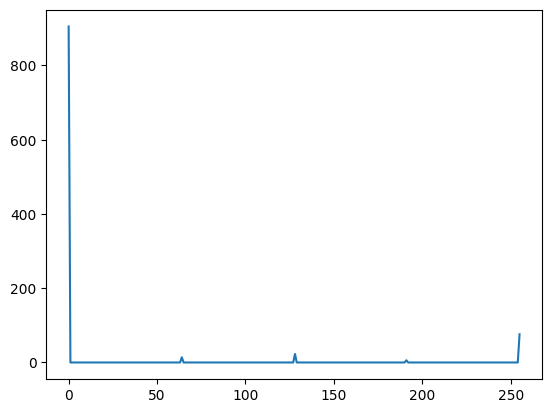

In [23]:
hist = sample[0][0].histc(bins=256, min=0, max=1)
plt.plot(hist)

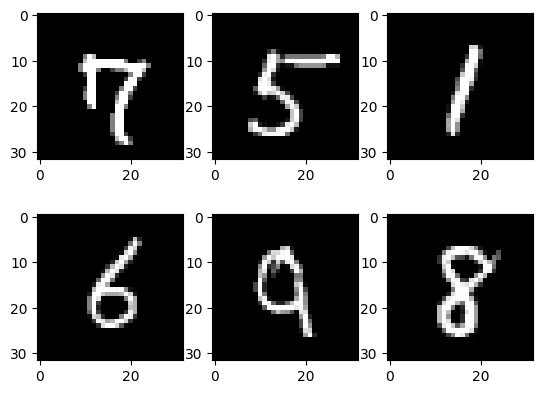

In [14]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(sample[i][0], cmap='gray')

In [15]:
from torchsummary import summary
from model import LeNet_5

model = LeNet_5().to(device)
summary(model, input_size=(1, 32, 32))

LeNet_5(
  (cnn_model): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc_model): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
              ReLU-2            [-1, 6, 28, 28]               0
         AvgPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
              ReLU-5     

In [16]:
# Load the saved model
from model import LeNet_5
model = LeNet_5().to(device)
# Check if the loaded object is a state_dict or a model instance
loaded_obj = torch.load('lenet5.pth', map_location=device)
if isinstance(loaded_obj, dict):
    model.load_state_dict(loaded_obj)
else:
    model = loaded_obj.to(device)
model.eval()

# Function to test the model accuracy
def test_accuracy(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

# Test the model accuracy
accuracy = test_accuracy(model, test_loader)
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')

C:\Users\acer\AppData\Local\Temp\ipykernel_19332\3127551400.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_obj = torch.load('lenet5.pth', map_location=device)


Accuracy of the model on the test images: 98.97%
